# Example 2

This is taken from https://github.com/svenreiche/Genesis-1.3-Version4/

In [1]:
from genesis.version4 import Genesis4

%config InlineBackend.figure_format = 'retina' # Nicer plots

In [2]:
G = Genesis4("data/example2-dumps/Example2.in")

In [3]:
G.run()

Genesis4Output(run=error=False error_reason='' run_script='/Users/klauer/miniforge3/envs/lume-genesis/bin/genesis4 -l Example2.lat genesis4.in' run_time=5.463458250043914)

<!-- lume-genesis detected Jupyter and will use HTML for rendering. -->

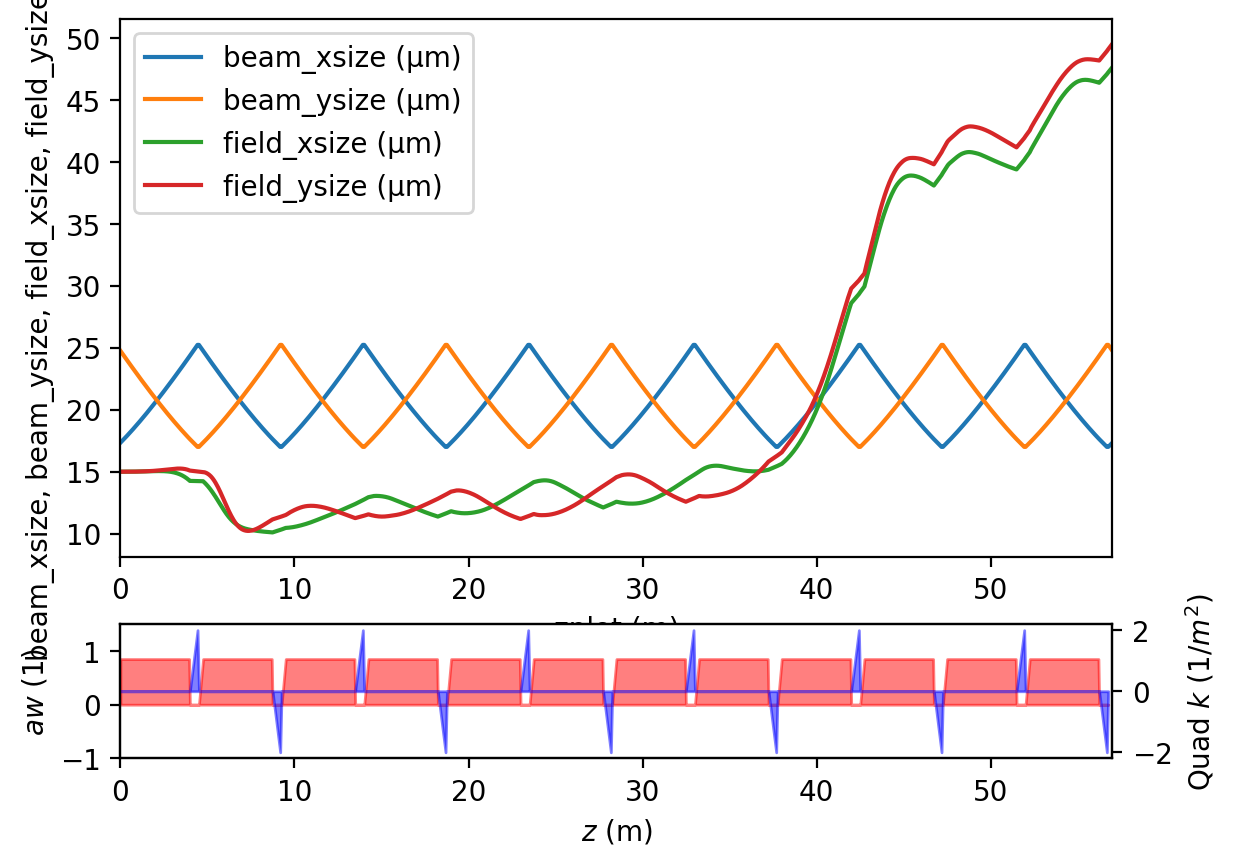

In [4]:
G.plot(["beam_xsize", "beam_ysize", "field_xsize", "field_ysize"])

# Replicate plots from the official docs

In [5]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

In [6]:
output = G.output
print("Loaded fields:", output.load_fields())
print("Total loaded particles files=", len(output.load_particles()))

Loaded fields: ['Example2.552', 'dump', 'Example2.184', 'Example2.368', 'Example2.736', 'Example2.1104', 'Example2.920']


Total loaded particles files= 553


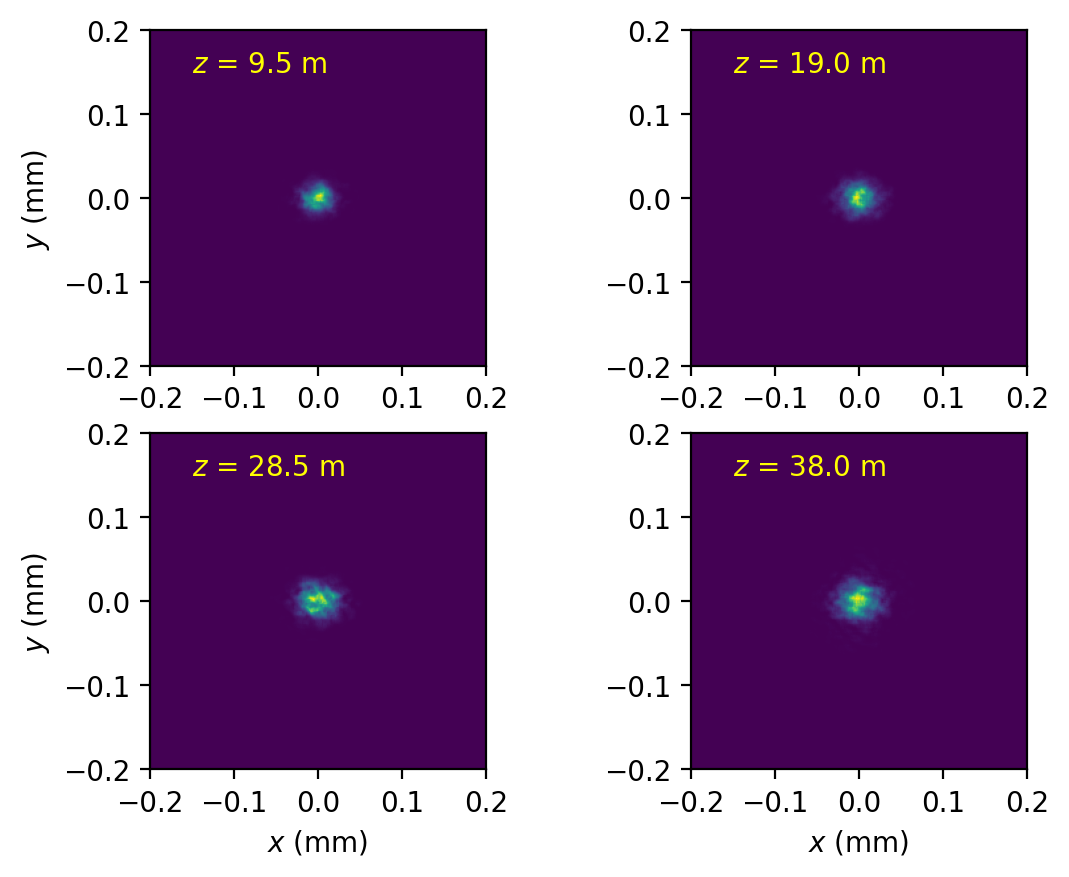

In [7]:
def get_slice(field, slc: int) -> np.ndarray:
    return field.dfl[:, :, slc]


def getWF(field, slice=0):
    ng = field.param["gridpoints"]
    dg = field.param["gridsize"]
    # inten = np.reshape(fre * fre + fim * fim, (ng, ng))
    inten = np.abs(get_slice(field, slice) ** 2)
    return inten, dg * (ng - 1) * 0.5 * 1e3


def getPS(particles):
    gamma = particles.gamma * 0.511e-3
    theta = np.mod(particles.theta - np.pi * 0.5, 2 * np.pi)
    return theta, gamma


def getTS(particles):
    x = particles.x * 1e6
    theta = particles.theta
    theta = np.mod(theta - np.pi * 0.5, 2 * np.pi)
    return theta, x


# plot wavefront
istep = 184
_, axs = plt.subplots(2, 2)
color = "yellow"
for i1 in range(2):
    for i2 in range(2):
        i = (i2 * 2 + i1 + 1) * istep
        inten, dg = getWF(output.fields[f"Example2.{i}"], slice=0)
        axs[i2, i1].imshow(inten, extent=(-dg, dg, -dg, dg))
        txt = r"$z$ = %3.1f m" % (9.5 * (i2 * 2 + i1 + 1))
        axs[i2, i1].text(-0.15, 0.15, txt, color=color)

axs[1, 0].set_xlabel(r"$x$ (mm)")
axs[1, 1].set_xlabel(r"$x$ (mm)")
axs[0, 0].set_ylabel(r"$y$ (mm)")
axs[1, 0].set_ylabel(r"$y$ (mm)")
plt.show()

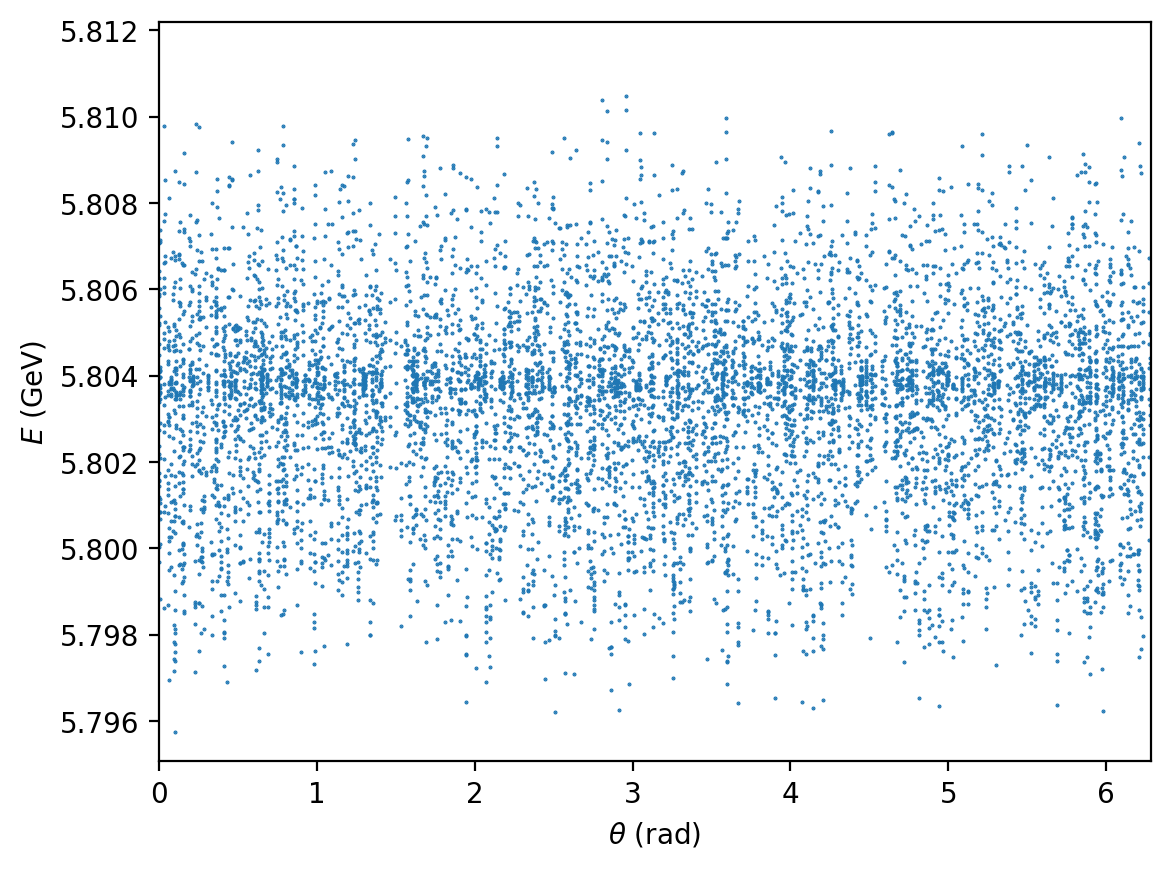

In [8]:
# get range for phase space plots
emin = np.min(output.beam["emin"]) * 0.511e-3
emax = np.max(output.beam["emax"]) * 0.511e-3
xmin = np.min(output.beam["xmin"]) * 1e6
xmax = np.max(output.beam["xmax"]) * 1e6

# plot final phase space
t, g = getPS(output.particles["Example2.700"])
plt.scatter(t, g, s=0.2)
plt.xlabel(r"$\theta$ (rad)")
plt.ylabel(r"$E$ (GeV)")
plt.xlim([0, 2 * np.pi])
plt.ylim([emin, emax])
plt.show()

# Animate phase space

## Animation 1

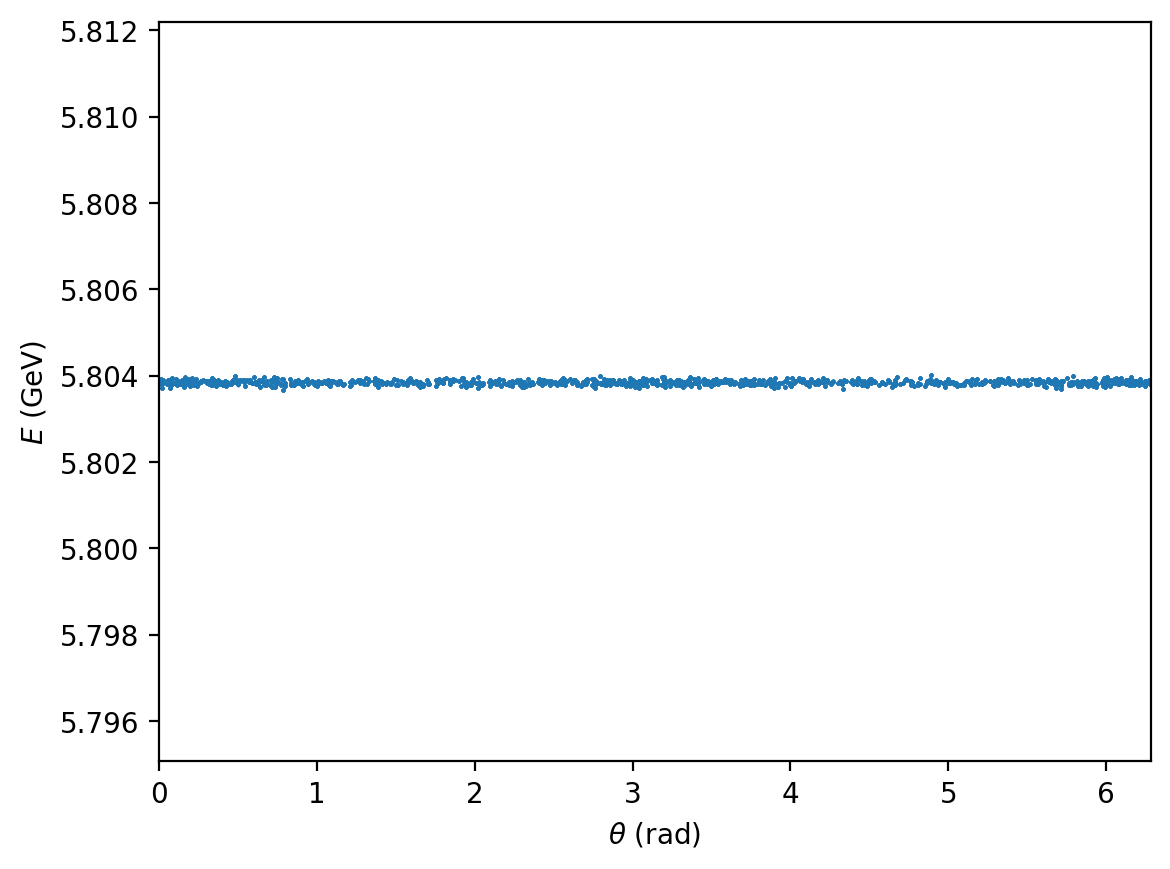

In [9]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 2 * np.pi), ylim=(emin, emax))
ax.set_xlabel(r"$\theta$ (rad)")
ax.set_ylabel(r"$E$ (GeV)")
scat = ax.scatter([], [], s=0.2)


def init():
    scat.set_offsets(np.empty((0, 2)))
    return (scat,)


def animate(i):
    t, g = getPS(output.particles[f"Example2.{2 * i}"])
    scat.set_offsets(np.hstack((t[:, np.newaxis], g[:, np.newaxis])))
    return (scat,)


animate(1);

In [10]:
from IPython.display import Video

anim = animation.FuncAnimation(
    fig, animate, init_func=init, blit=False, interval=20, frames=500
)
anim.save("Animation1.mp4")

Video("Animation1.mp4")

## Animation 2

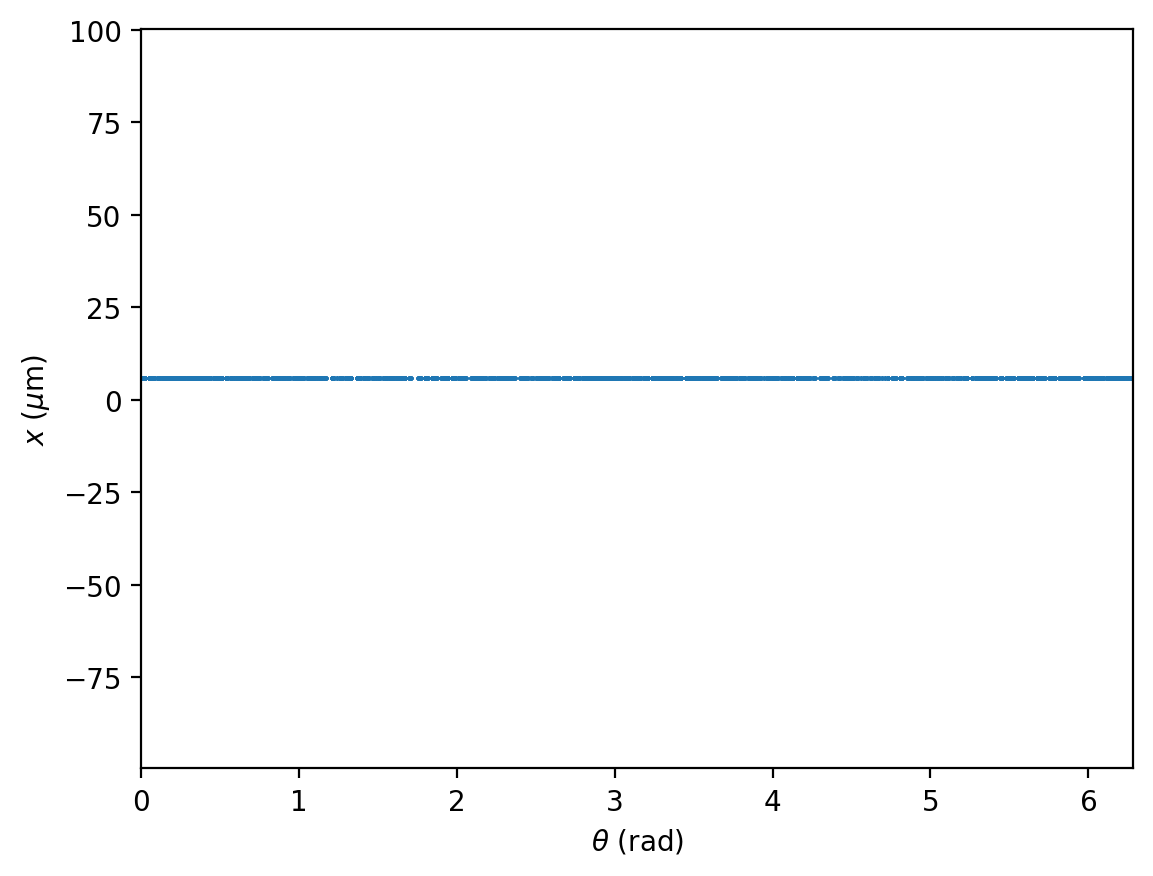

In [11]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 2 * np.pi), ylim=(xmin, xmax))
ax.set_xlabel(r"$\theta$ (rad)")
ax.set_ylabel(r"$x$ ($\mu$m)")
scat = ax.scatter([], [], s=0.2)


def animate2(i):
    t, g = getTS(output.particles[f"Example2.{2 * i}"])
    scat.set_offsets(np.hstack((t[:, np.newaxis], g[:, np.newaxis])))
    return (scat,)


animate(1);

In [12]:
anim = animation.FuncAnimation(
    fig, animate, init_func=init, blit=False, interval=20, frames=500
)
anim.save("Animation2.mp4")

Video("Animation2.mp4")